In [1]:
import os, warnings
import numpy as np
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [2]:
import mglearn

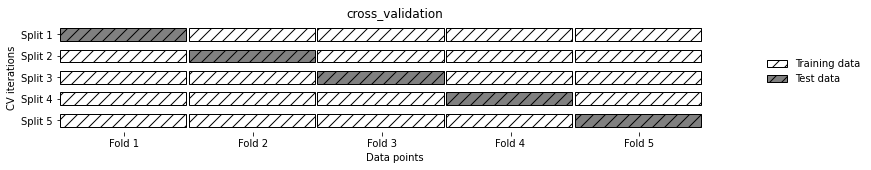

In [3]:
mglearn.plots.plot_cross_validation()

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [6]:
iris=load_iris()
logreg=LogisticRegression() #모델 선택

In [7]:
score=cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수 : {}'.format(score))

교차 검증 점수 : [0.96666667 1.         0.93333333 0.96666667 1.        ]


### 계층별 iris 데이터 분석

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris 레이블 :\n{}".format(iris.target))

iris 레이블 :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
scores=cross_val_score(logreg,iris.data,iris.target, cv=3)
print(score)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [11]:
from sklearn.model_selection import KFold

In [12]:
kfold=KFold(n_splits=3)
score=cross_val_score(logreg, iris.data,iris.target, cv=kfold)
print('교차검증 점수 : \n{}'.format(score))
### KFold는 데이터를 섞지 않고 뽑기 때문에 0이 뜸.

교차검증 점수 : 
[0. 0. 0.]


In [13]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(logreg, iris.data,iris.target, cv=kfold)
print('교차검증 점수 : \n{}'.format(score))

교차검증 점수 : 
[0.98 0.96 0.96]


### LOOCV (Leave One Out Cross Validation)
* 폴드 하나에 샘플 하나만 들어있는 k겹 교차검증.
* 각 반복에 하나의 데이터 포인트를 선택해 테스트 데이터 세트로 제공
* 한 세트에 여러겹을 실행하므로 대용량 데이터에는 부적합.

In [14]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()

score=cross_val_score(logreg, iris.data, iris.target, cv=loo)

print('교차 검증 분할 횟수 : ',len(score))
print('평균 점수 : {:.2f}'.format(scores.mean()))

교차 검증 분할 횟수 :  150
평균 점수 : 0.97


### 모델 평가
* GridSearch
    * 하이퍼 파라미터는 사용자가 조정할 수 있는 매개변수.

In [18]:
# 코드 재실행용 라이브러리 호출 함수
from sklearn.model_selection import train_test_split
import mglearn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.svm import SVC

In [17]:
iris=load_iris()

In [19]:
## 데이터 셋 나누기
X=iris.data
y=iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [20]:
### SVC 매개변수 gamma, 규제 매개변수 C

In [21]:
best_score=0

gamma_par=[.001, .01, .1, 1, 10, 100]
par_C=[.001,.01,.1,1,10,100]

for g in gamma_par:
    for pc in par_C:
        svm=SVC(gamma=g, C=pc)
        svm.fit(X_train, y_train)

        # 테스트 세로로 SVC 평가
        score = svm.score(X_test,y_test)

        print('gamma: {}, C: {}, score: {}'.format(g,pc,score))

gamma: 0.001, C: 0.001, score: 0.23684210526315788
gamma: 0.001, C: 0.01, score: 0.23684210526315788
gamma: 0.001, C: 0.1, score: 0.23684210526315788
gamma: 0.001, C: 1, score: 0.5789473684210527
gamma: 0.001, C: 10, score: 0.9210526315789473
gamma: 0.001, C: 100, score: 0.9736842105263158
gamma: 0.01, C: 0.001, score: 0.23684210526315788
gamma: 0.01, C: 0.01, score: 0.23684210526315788
gamma: 0.01, C: 0.1, score: 0.5789473684210527
gamma: 0.01, C: 1, score: 0.9210526315789473
gamma: 0.01, C: 10, score: 0.9736842105263158
gamma: 0.01, C: 100, score: 0.9736842105263158
gamma: 0.1, C: 0.001, score: 0.23684210526315788
gamma: 0.1, C: 0.01, score: 0.23684210526315788
gamma: 0.1, C: 0.1, score: 0.9210526315789473
gamma: 0.1, C: 1, score: 0.9736842105263158
gamma: 0.1, C: 10, score: 0.9736842105263158
gamma: 0.1, C: 100, score: 0.9473684210526315
gamma: 1, C: 0.001, score: 0.23684210526315788
gamma: 1, C: 0.01, score: 0.23684210526315788
gamma: 1, C: 0.1, score: 0.9736842105263158
gamma: 1, 